In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

sns.set(style='whitegrid',color_codes=True)

In [2]:
data=pd.read_csv(r'Wine.csv')

In [3]:
scaler=MinMaxScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)
X=scaled_data[:,0:13]
Y=data['quality'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=23)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [4]:
models=[GaussianNB(),SGDClassifier(),KNeighborsClassifier()
        ,LinearSVC(),LogisticRegression(),SVC(kernel='rbf')
        ,DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()
        ,RandomForestClassifier(),BaggingClassifier(),ExtraTreesClassifier()
        ,XGBClassifier()]

model_names=['GaussianNB','SGDClassifier','KNearestNeighbors'
             ,'LinearSVM','LogisticRegression','rbfSVM'
             ,'DecisionTree','AdaBoostClassifier','GradientBoostingClassifier'
             ,'RandomForestClassifier','BaggingClassifier','ExtraTreesClassifier'
             ,'xgboost'
]

accuracy=[]
clf=[]
i=0
t=[]
for m in range(len(models)):
    clf.append(models[m])
    time_start = time.time()
    scores = cross_val_score(clf[i],x_train,y_train, cv=5, scoring='accuracy',n_jobs=-1)
    time_end = time.time()
    t.append(time_end-time_start)
    accuracy.append(scores.mean())
    i=i+1
result_frame=pd.DataFrame({'Model':model_names,'Accuracy':accuracy,'Time':t})

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few

In [5]:
result_frame

,Model,Accuracy,Time
0,GaussianNB,0.387928,2.678082
1,SGDClassifier,0.463985,1.454146
2,KNearestNeighbors,0.544522,0.131653
3,LinearSVM,0.526924,0.383430
4,LogisticRegression,0.530452,0.135405
5,rbfSVM,0.517670,1.602843
6,DecisionTree,0.573124,0.119842
7,AdaBoostClassifier,0.380219,0.575231
8,GradientBoostingClassifier,0.579060,4.885137
9,RandomForestClassifier,0.636905,0.153127


In [6]:
clf_stacking=VotingClassifier(estimators=[('rbfSVM', clf[5])
                                          ,('DecisionTree', clf[6])
                                          ,('GradientBoostingClassifier', clf[8])
                                          ,('RandomForestClassifier', clf[9])
                                          , ('BaggingClassifier', clf[10])
                                          , ('ExtraTreesClassifier', clf[11])
                                          ,('Xgboost', clf[12])
                                         ], voting='hard')
stacking_time_start = time.time()
stacking_score=cross_val_score(clf_stacking,x_train,y_train, cv=5, scoring='accuracy',n_jobs=-1).mean()
stacking_time_end = time.time()

D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [7]:
result_frame=result_frame.append({'Model':'NN','Accuracy':0.564835
                                  ,'Time':21.752263}, ignore_index=True)
result_frame=result_frame.append({'Model':'stacking','Accuracy':stacking_score
                                  ,'Time':stacking_time_end-stacking_time_start}, ignore_index=True)
result_frame

,Model,Accuracy,Time
0,GaussianNB,0.387928,2.678082
1,SGDClassifier,0.463985,1.454146
2,KNearestNeighbors,0.544522,0.131653
3,LinearSVM,0.526924,0.383430
4,LogisticRegression,0.530452,0.135405
5,rbfSVM,0.517670,1.602843
6,DecisionTree,0.573124,0.119842
7,AdaBoostClassifier,0.380219,0.575231
8,GradientBoostingClassifier,0.579060,4.885137
9,RandomForestClassifier,0.636905,0.153127


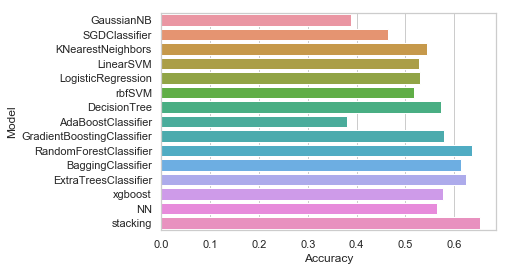

In [8]:
sns.barplot(y='Model',x='Accuracy',data=result_frame)

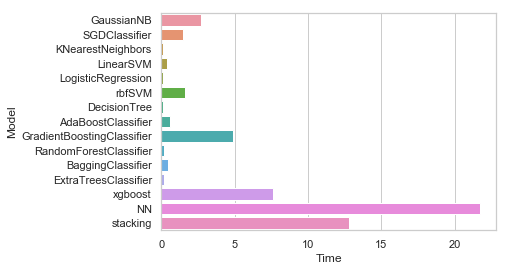

In [9]:
sns.barplot(y='Model',x='Time',data=result_frame)

调参

1.KNN

In [9]:
n_neighbors=[i+1 for i in range(6)]
params_dict={'n_neighbors':n_neighbors,'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_knn.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [10]:
clf_knn.best_score_

0.5863206509786673

In [11]:
clf_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 1}

In [12]:
clf_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

2.SVM

在1到1000之间选取

In [13]:
params_dict={'C':[1,40,100,1000],'gamma':[1,140,500,1000],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_svm.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 40, 100, 1000], 'gamma': [1, 140, 500, 1000], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [14]:
clf_svm.best_score_

0.618869584341324

In [15]:
clf_svm.best_params_

{'C': 40, 'gamma': 140, 'kernel': 'rbf'}

In [16]:
clf_svm.best_estimator_

SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=140, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

3 . LOGISTIC REGRESSION.

In [17]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_lr.fit(x_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   22.2s finished
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [18]:
clf_lr.best_score_

0.5344182977787553

In [19]:
clf_lr.best_params_

{'C': 1, 'penalty': 'l1'}

In [20]:
clf_lr.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

4.Decision Tree

In [21]:
params_dict={'criterion':['gini','entropy'],'min_impurity_decrease':[10**-i for i in range(11)]}
clf_tree=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_tree.fit(x_train,y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_impurity_decrease': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [22]:
clf_tree.best_score_

0.5746646140312294

In [23]:
clf_tree.best_params_

{'criterion': 'gini', 'min_impurity_decrease': 1e-05}

In [24]:
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-05, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

5.GRADIENT BOOSTING

In [25]:
params_dict={'n_estimators':[300,500,800]}
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=5,param_grid=params_dict,n_jobs=-1,verbose=1)
clf_gb.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   39.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [26]:
clf_gb.best_score_

0.629425995161645

In [27]:
clf_gb.best_params_

{'n_estimators': 800}

In [28]:
clf_gb.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

6.Random forests

In [29]:
params_dict={'n_estimators':[300,500,800],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_rf.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   42.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 800], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [30]:
clf_rf.best_score_

0.6661535078073455

In [31]:
clf_rf.best_params_

{'max_features': 'log2', 'n_estimators': 500}

In [32]:
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

7.Bagging

In [33]:
params_dict={'n_estimators':[300,500,800],'bootstrap':[True,False]}
clf_bagging=GridSearchCV(estimator=BaggingClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_bagging.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 800], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [34]:
clf_bagging.best_score_

0.6542775456344843

In [35]:
clf_bagging.best_params_

{'bootstrap': True, 'n_estimators': 500}

In [37]:
clf_bagging.best_estimator_

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

8.ExtraTreesClassifier

In [39]:
params_dict={'n_estimators':[5,10,50,100,200,300],'bootstrap':[True,False]}
clf_extratrees=GridSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_extratrees.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [40]:
clf_extratrees.best_score_

0.6650538816802287

In [41]:
clf_extratrees.best_params_

{'bootstrap': True, 'n_estimators': 300}

In [42]:
clf_extratrees.best_estimator_

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

9.xgboost

In [43]:
params_dict={'n_estimators':[100],'gamma':[10**-i for i in range(10)]}
clf_xgb1=GridSearchCV(estimator=XGBClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_xgb1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
D:\Program Files\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
D:\Program Files\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
D:\Program Files\Anaconda3\lib\site-packages

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [44]:
clf_xgb1.best_score_

0.5784033428634264

In [45]:
clf_xgb1.best_params_

{'gamma': 0.1, 'n_estimators': 100}

In [46]:
params_dict={'n_estimators':[100],'gamma':[0.1],'max_depth':[10,13,15,17,20],'min_weight':[1]}
clf_xgb2=GridSearchCV(estimator=XGBClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_xgb2.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100], 'gamma': [0.1], 'max_depth': [10, 13, 15, 17, 20], 'min_weight': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [47]:
clf_xgb2.best_score_

0.6573564987904112

In [48]:
clf_xgb2.best_params_

{'gamma': 0.1, 'max_depth': 15, 'min_weight': 1, 'n_estimators': 100}

In [49]:
params_dict={'n_estimators':[100],'gamma':[0.1],'max_depth':[15],'min_weight':[1],'subsample':[0.6, 0.7, 0.8, 0.9]
,'colsample_bytree':[0.6, 0.7, 0.8, 0.9]}
clf_xgb3=GridSearchCV(estimator=XGBClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_xgb3.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100], 'gamma': [0.1], 'max_depth': [15], 'min_weight': [1], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [51]:
clf_xgb3.best_score_

0.6597756762700682

In [50]:
clf_xgb3.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.1,
 'max_depth': 15,
 'min_weight': 1,
 'n_estimators': 100,
 'subsample': 0.9}

In [52]:
params_dict={'colsample_bytree': [0.6],'gamma': [0.1],'max_depth': [15],'min_weight': [1],'n_estimators': [100],'subsample': [0.9]
             ,'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],'reg_lambda':[1,5,10,50]}
clf_xgb4=GridSearchCV(estimator=XGBClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5 ,n_jobs=-1,verbose=1)
clf_xgb4.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'colsample_bytree': [0.6], 'gamma': [0.1], 'max_depth': [15], 'min_weight': [1], 'n_estimators': [100], 'subsample': [0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'reg_lambda': [1, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [53]:
clf_xgb4.best_score_

0.6628546294259952

In [54]:
clf_xgb4.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.1,
 'max_depth': 15,
 'min_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.01,
 'reg_lambda': 5,
 'subsample': 0.9}

In [60]:
clf_xgb4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=15, min_child_weight=1, min_weight=1,
       missing=None, n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0.01,
       reg_lambda=5, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9)